# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [2]:
data = pd.read_excel("glass.xlsx", sheet_name= 'glass')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Checking for null values

In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

- no null values

## Data Visualization

### Histograms

In [6]:
def create_histograms(data, features, figsize=(20, 12)):
    """Create histograms with KDE for numerical features, including mean and median lines."""
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Distribution of Numerical Features', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.histplot(data=data, x=feature, kde=True, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        mean_val, median_val = data[feature].mean(), data[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.set_title(f'{feature} Distribution', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.legend(fontsize=10)

    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()

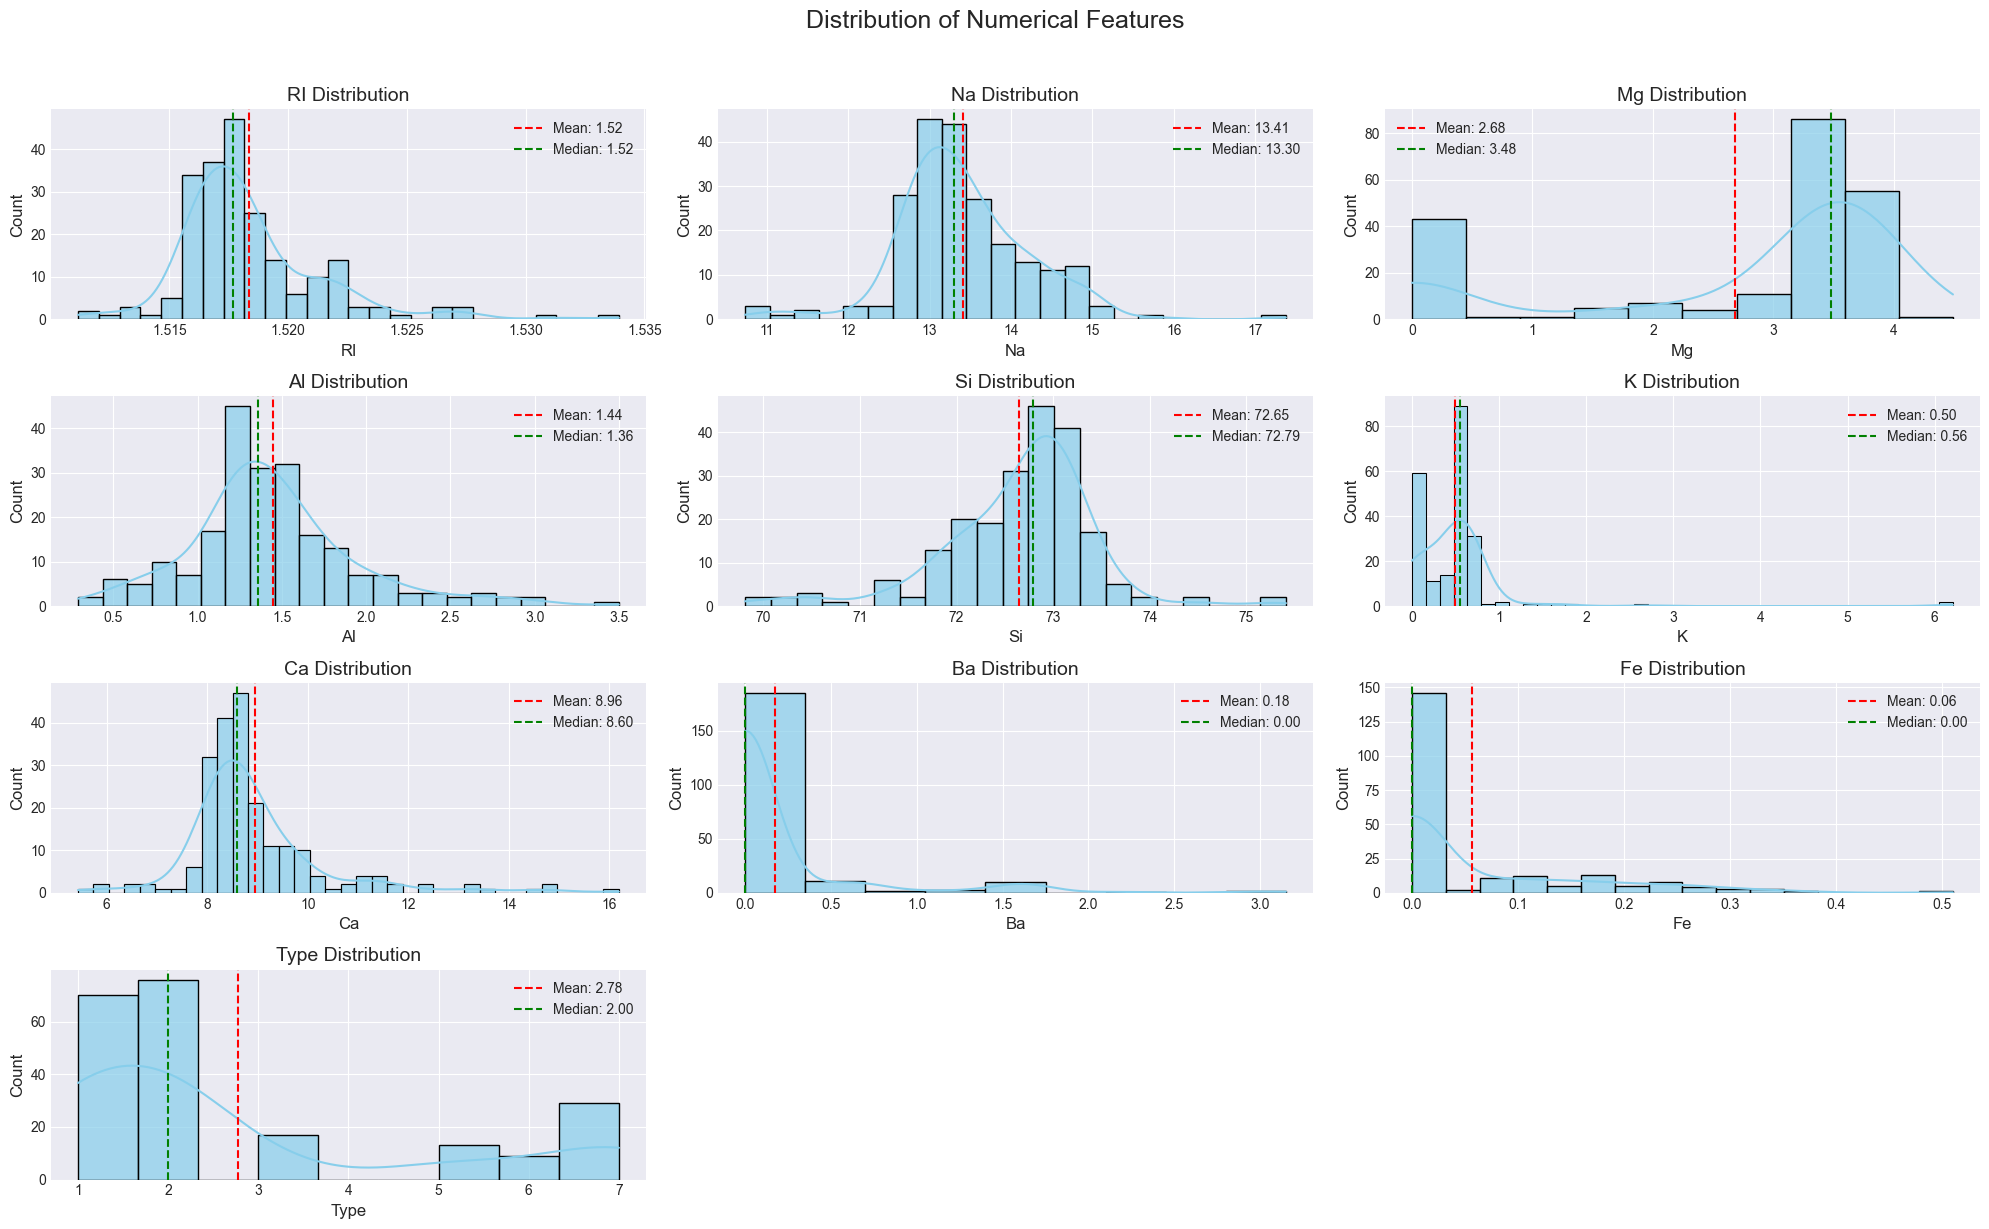

In [8]:
create_histograms(data= data,
                  features= data.columns)

### KDE Plots

In [9]:
def create_kde_plots(data, features, figsize=(20, 12)):
    """Create separate KDE plots for numerical features."""
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('KDE Plots of Numerical Features', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.kdeplot(data=data, x=feature, ax=ax, color='darkblue', fill=True, alpha=0.4)
        ax.set_title(f'{feature} KDE Plot', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Density', fontsize=12)

    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()

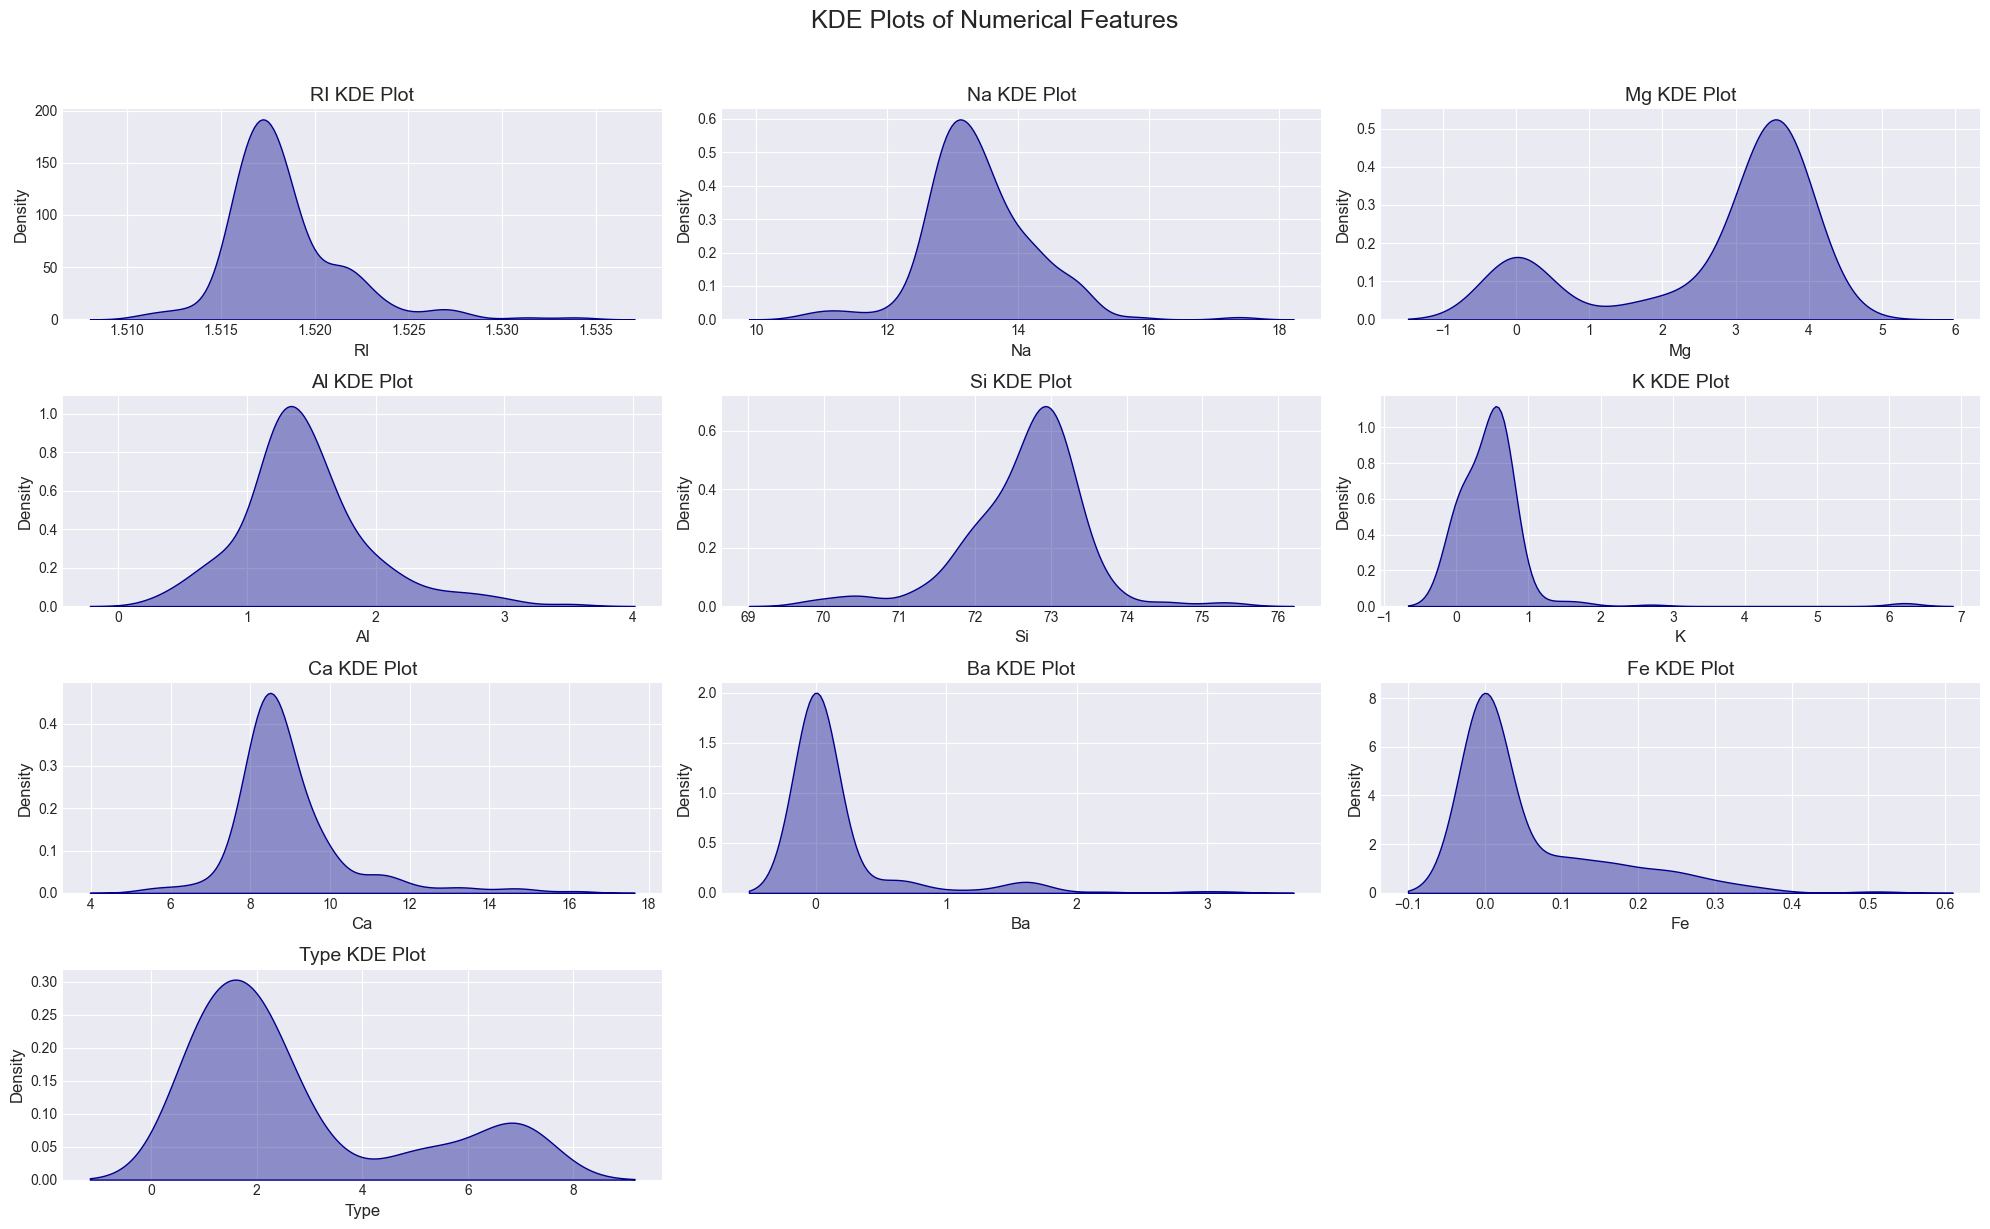

In [10]:
create_kde_plots(data= data,
                 features= data.columns)

### Box Plots

In [11]:
def create_boxplots(data, features, figsize=(20, 12)):
    """Create boxplots for numerical features to identify outliers."""
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Boxplots of Numerical Features', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.boxplot(x=data[feature], ax=ax, color='lightgreen')
        ax.set_title(f'{feature} Boxplot', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)

    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()

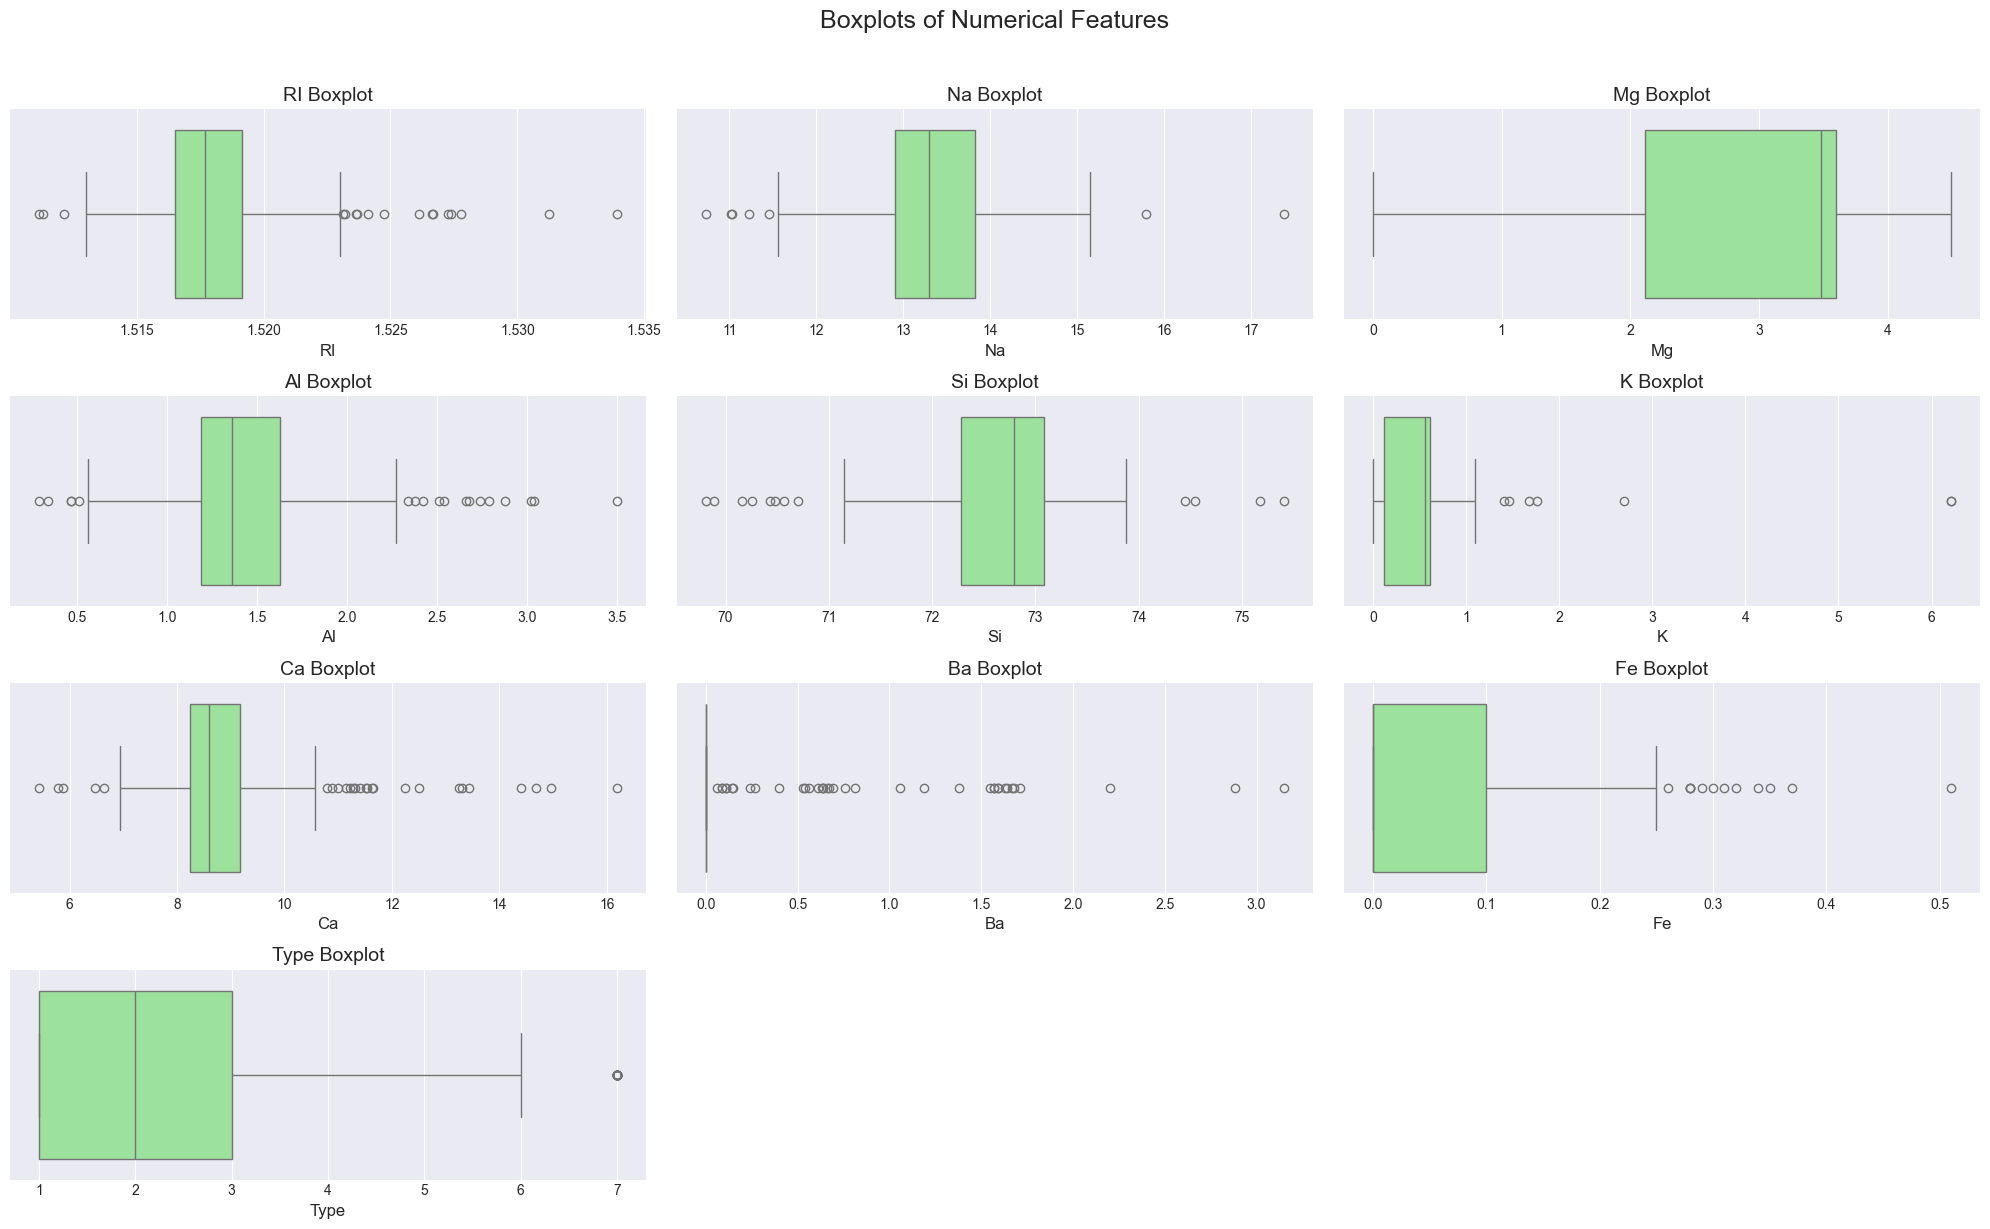

In [12]:
create_boxplots(data= data,
                features= data.columns)

### Heatmap

In [13]:
def create_correlation_heatmap(data, features):
    """Create a heatmap to visualize correlations between numerical features."""
    plt.figure(figsize=(12, 10))
    corr_matrix = data[features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap', fontsize=18)
    plt.show()

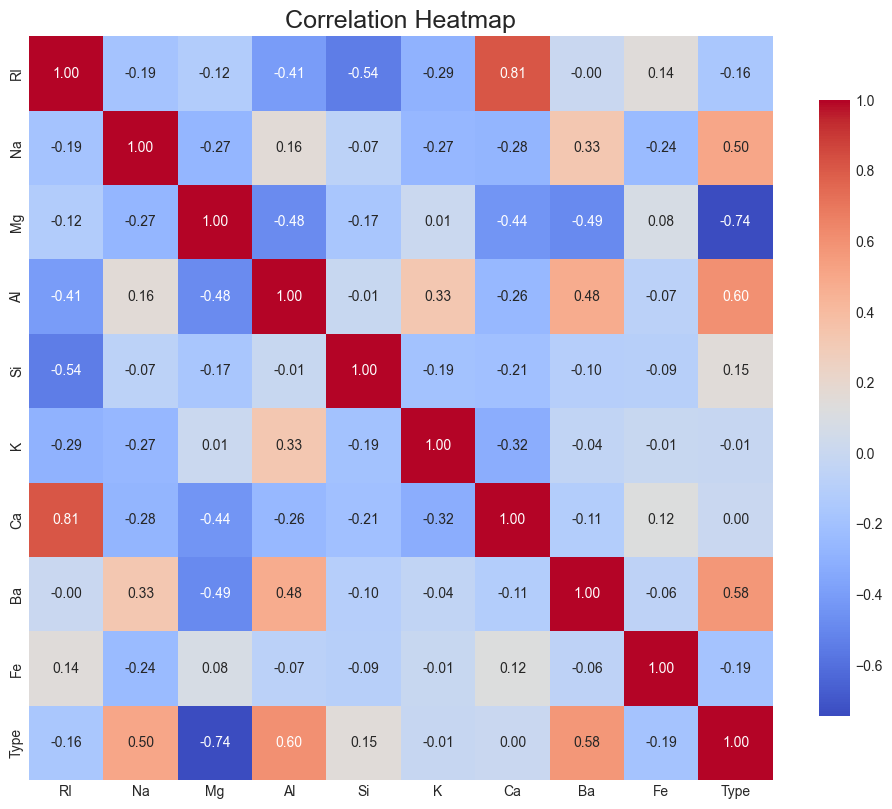

In [14]:
create_correlation_heatmap(data= data,
                           features= data.columns)

### Pair Plot

In [17]:
def create_pairplot(data, features, hue=None):
    """Create a pair plot for numerical features to visualize pairwise relationships."""
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.pairplot(data=data, vars=features, hue=hue, palette='husl', diag_kind='kde', corner=True)
    plt.suptitle('Pair Plot of Numerical Features', fontsize=18, y=1.02)
    plt.show()

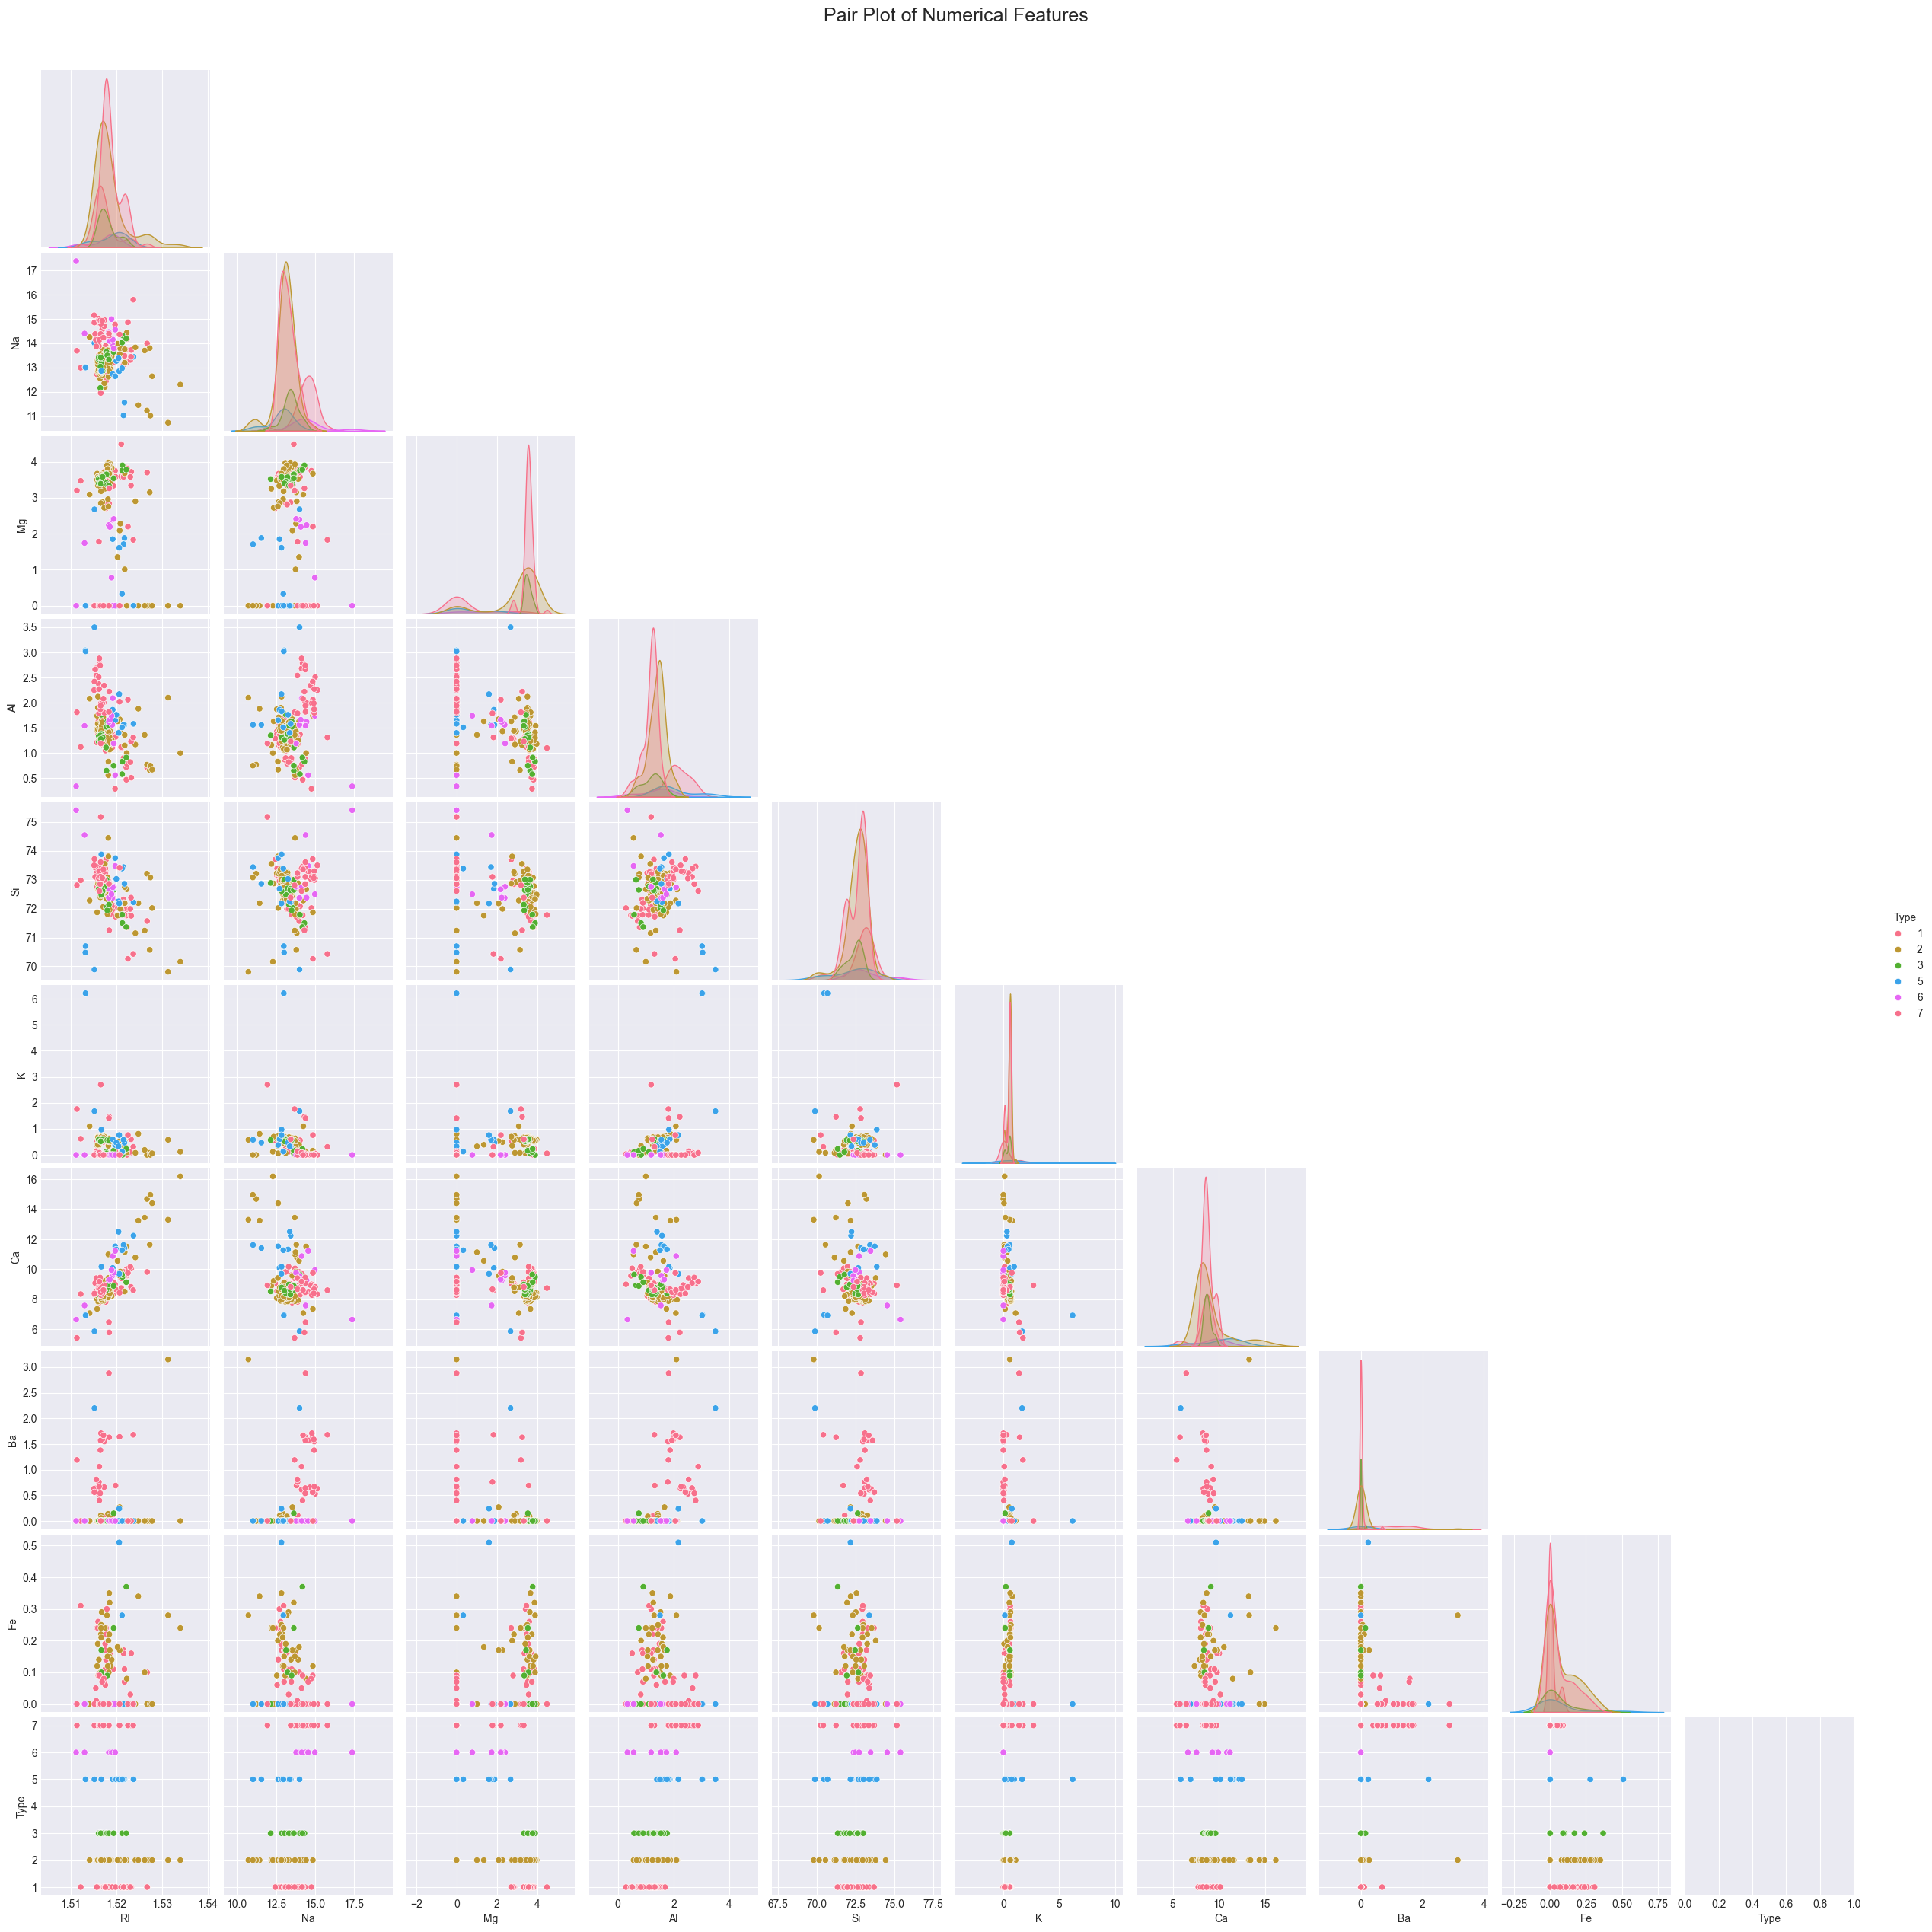

In [18]:
create_pairplot(data= data,
                features= data.columns,
                hue= 'Type')

### Target feature distribution

In [15]:
def create_target_distribution(data, target):
    """Create a bar plot to visualize the distribution of the target feature."""
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target, data=data, palette='viridis')
    plt.title('Target Feature Distribution', fontsize=18)
    plt.xlabel(target, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()

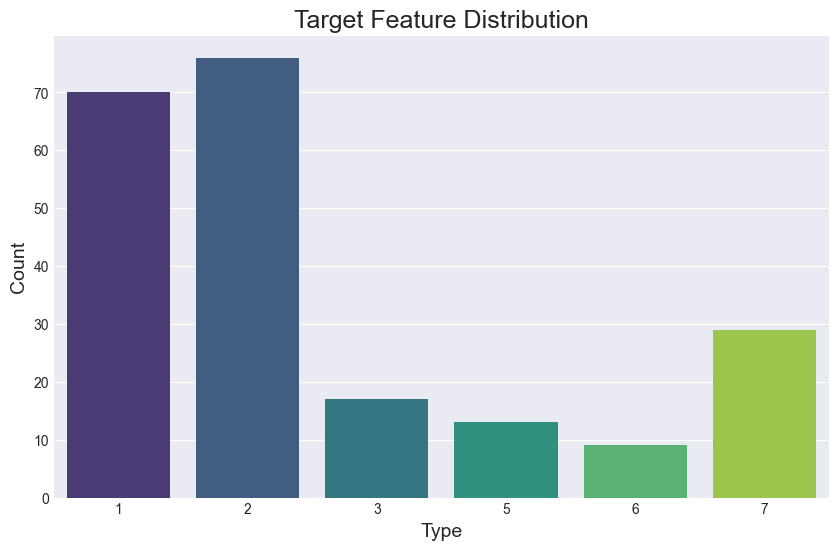

In [16]:
create_target_distribution(data= data, 
                           target= "Type")